#### Evaluation of COVID-19 Data Analysis Results <br>
##### Author: Vishwas Narayan <br>

In [1]:
#Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import radviz
import plotly.express as plotlybar
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [2]:
#Reading the datasets and storing it in a dataframe
us_counties_df=pd.read_csv('2021-04-21_us_counties_covid19_daily.csv')
us_states_df=pd.read_csv('2021-04-21_us_states_covid19_daily.csv')
us_daily_df=pd.read_csv('2021-04-21_covid19_daily.csv')
us_postal_code_df=pd.read_excel('US postal code.xlsx')

In [3]:
#Formatting the dataframe by including the 'State' column
us_states_df.rename(columns={'state':'Postal Code'},inplace=True)
us_states_df=us_states_df.merge(us_postal_code_df,on=['Postal Code'],how='left')
us_states_df.head()

date Postal Code  positive  probableCases   negative  pending  \
0  20201206          AK   35720.0            NaN  1042056.0      NaN   
1  20201206          AL  269877.0        45962.0  1421126.0      NaN   
2  20201206          AR  170924.0        22753.0  1614979.0      NaN   
3  20201206          AS       0.0            NaN     2140.0      NaN   
4  20201206          AZ  364276.0        12590.0  2018813.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1077776.0                  164.0   
1  totalTestsPeopleViral         1645041.0                 1927.0   
2        totalTestsViral         1763150.0                 1076.0   
3        totalTestsViral            2140.0                    NaN   
4  totalTestsPeopleViral         2370499.0                 2977.0   

   hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
0                   799.0  ...              0                     0   
1                 26331.0  ...             12                     0   
2                  9401.0  ...             40                    21   
3                     NaN  ...              0                     0   
4                 28248.0  ...             25                   242   

                                       hash  commercialScore  \
0  7b1d31e2756687bb9259b29195f1db6cdb321ea6                0   
1  19454ed8fe28fc0a7948fc0771b2f3c846c1c92e                0   
2  25fc83bffff5b32ba1a737be8e087fad9f4fde33                0   
3  8c39eec317586b0c34fc2903e6a3891ecb00469e                0   
4  7cf59da9e4bc31d905e179211313d08879880a85                0   

   negativeRegularScore negativeScore positiveScore score grade  \
0                     0             0             0     0   NaN   
1                     0             0             0     0   NaN   
2                     0             0             0     0   NaN   
3                     0             0             0     0   NaN   
4                     0             0             0     0   NaN   

   State/District  
0          Alaska  
1         Alabama  
2        Arkansas  
3  American Samoa  
4         Arizona  

[5 rows x 56 columns]

In [4]:
#Formatting the 'Date' Column to date-time format
us_states_df['date']=pd.to_datetime(us_states_df['date'],format='%Y%m%d')
us_daily_df['date']=pd.to_datetime(us_daily_df['date'],format='%Y%m%d')
us_states_df.rename(columns={'State/District':'State'},inplace=True)

In [5]:
us_daily_df.head()

date  states  positive   negative  pending  hospitalizedCurrently  \
0 2020-12-06      56  14534035  161986294  13592.0               101487.0   
1 2020-12-05      56  14357264  160813704  13433.0               101190.0   
2 2020-12-04      56  14146191  159286709  12714.0               101276.0   
3 2020-12-03      56  13921360  158026052  15106.0               100755.0   
4 2020-12-02      56  13711156  156787587  14368.0               100322.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                585676.0         20145.0          31946.0   
1                583420.0         19950.0          31831.0   
2                580104.0         19858.0          31608.0   
3                575452.0         19723.0          31276.0   
4                570121.0         19680.0          31038.0   

   onVentilatorCurrently  ...  totalTestResults          lastModified total  \
0                 7094.0  ...         204063869  2020-12-06T24:00:00Z     0   
1                 7005.0  ...         202429337  2020-12-05T24:00:00Z     0   
2                 6999.0  ...         200259581  2020-12-04T24:00:00Z     0   
3                 6867.0  ...         198404712  2020-12-03T24:00:00Z     0   
4                 6855.0  ...         196576482  2020-12-02T24:00:00Z     0   

   posNeg  deathIncrease  hospitalizedIncrease negativeIncrease  \
0       0           1138                  2256          1172590   
1       0           2445                  3316          1526995   
2       0           2563                  4652          1260657   
3       0           2706                  5331          1238465   
4       0           2733                  5028           982032   

   positiveIncrease  totalTestResultsIncrease  \
0            176771                   1634532   
1            211073                   2169756   
2            224831                   1854869   
3            210204                   1828230   
4            195796                   1459202   

                                       hash  
0  9cf16504f91958e803a2197daf8c2528a4eddc18  
1  6249216c5f097c94ce33a811dab011a483a42404  
2  ae30ea088584335ba4d57ee927f8dbda6add74db  
3  0f253d185ecb336cdd18a4c61996eda1b7eef13b  
4  477c17b6302d0485195e77ecf8270a974f7a3c82  

[5 rows x 25 columns]

In [6]:
us_states_df.head()

date Postal Code  positive  probableCases   negative  pending  \
0 2020-12-06          AK   35720.0            NaN  1042056.0      NaN   
1 2020-12-06          AL  269877.0        45962.0  1421126.0      NaN   
2 2020-12-06          AR  170924.0        22753.0  1614979.0      NaN   
3 2020-12-06          AS       0.0            NaN     2140.0      NaN   
4 2020-12-06          AZ  364276.0        12590.0  2018813.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1077776.0                  164.0   
1  totalTestsPeopleViral         1645041.0                 1927.0   
2        totalTestsViral         1763150.0                 1076.0   
3        totalTestsViral            2140.0                    NaN   
4  totalTestsPeopleViral         2370499.0                 2977.0   

   hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
0                   799.0  ...              0                     0   
1                 26331.0  ...             12                     0   
2                  9401.0  ...             40                    21   
3                     NaN  ...              0                     0   
4                 28248.0  ...             25                   242   

                                       hash  commercialScore  \
0  7b1d31e2756687bb9259b29195f1db6cdb321ea6                0   
1  19454ed8fe28fc0a7948fc0771b2f3c846c1c92e                0   
2  25fc83bffff5b32ba1a737be8e087fad9f4fde33                0   
3  8c39eec317586b0c34fc2903e6a3891ecb00469e                0   
4  7cf59da9e4bc31d905e179211313d08879880a85                0   

   negativeRegularScore negativeScore positiveScore score grade  \
0                     0             0             0     0   NaN   
1                     0             0             0     0   NaN   
2                     0             0             0     0   NaN   
3                     0             0             0     0   NaN   
4                     0             0             0     0   NaN   

            State  
0          Alaska  
1         Alabama  
2        Arkansas  
3  American Samoa  
4         Arizona  

[5 rows x 56 columns]

In [7]:
cases_CA = us_states_df[us_states_df['State'] == 'California']
cases_CA

date Postal Code   positive  probableCases    negative  pending  \
5     2020-12-06          CA  1341700.0            NaN  23853346.0      NaN   
61    2020-12-05          CA  1311625.0            NaN  23590350.0      NaN   
117   2020-12-04          CA  1286557.0            NaN  23388921.0      NaN   
173   2020-12-03          CA  1264539.0            NaN  23210103.0      NaN   
229   2020-12-02          CA  1245948.0            NaN  23053178.0      NaN   
...          ...         ...        ...            ...         ...      ...   
15257 2020-03-08          CA       88.0            NaN       462.0      NaN   
15308 2020-03-07          CA       69.0            NaN       462.0      NaN   
15358 2020-03-06          CA       60.0            NaN       462.0      NaN   
15395 2020-03-05          CA       53.0            NaN       462.0      NaN   
15425 2020-03-04          CA       53.0            NaN       462.0      NaN   

      totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
5            totalTestsViral        25195046.0                10624.0   
61           totalTestsViral        24901975.0                10273.0   
117          totalTestsViral        24675478.0                 9948.0   
173          totalTestsViral        24474642.0                 9702.0   
229          totalTestsViral        24299126.0                 9365.0   
...                      ...               ...                    ...   
15257        totalTestsViral             550.0                    NaN   
15308        totalTestsViral             531.0                    NaN   
15358        totalTestsViral             522.0                    NaN   
15395        totalTestsViral             515.0                    NaN   
15425        totalTestsViral             515.0                    NaN   

       hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
5                         NaN  ...             85                     0   
61                        NaN  ...            209                     0   
117                       NaN  ...            145                     0   
173                       NaN  ...            113                     0   
229                       NaN  ...            113                     0   
...                       ...  ...            ...                   ...   
15257                     NaN  ...              0                     0   
15308                     NaN  ...              0                     0   
15358                     NaN  ...              0                     0   
15395                     NaN  ...              0                     0   
15425                     NaN  ...              0                     0   

                                           hash  commercialScore  \
5      2fbb11905a59ffc894c8ec1ec6f051691be2381c                0   
61     86d01cdbc69e8f31a43025a1f3f05d3468d5ec15                0   
117    aafc314108ebfaf9c877640c12061ff460989a35                0   
173    960e056249878f14b2efda03317df7c3bab66d06                0   
229    a7a45a38ce8e8f1f4aa133438262997831fa0fc0                0   
...                                         ...              ...   
15257  f4b563adfd7eb6ca42789ae99d3b0f7bad4e2913                0   
15308  460b13c43b9f5ac14cef25a0a4143e666e84e9fc                0   
15358  5dcb4e2356df148513671071860ec5a059dc6de1                0   
15395  d3243f8be7b1c96e093dbeab8d271ff7ffe58a8a                0   
15425  aa361b70e8d21881b07d9cd5a11d86c377920af2                0   

       negativeRegularScore negativeScore positiveScore score grade  \
5                         0             0             0     0   NaN   
61                        0             0             0     0   NaN   
117                       0             0             0     0   NaN   
173                       0             0             0     0   NaN   
229                       0             0             0     0   NaN   
...                     ...           ... 

In [8]:
#Grouping the US States and resetting their indexes 
us_states_grp = us_states_df.groupby('State').sum().reset_index()
us_states_grp

State     positive  probableCases      negative  \
0                    Alabama   24282758.0      2594667.0  1.595672e+08   
1                     Alaska    1656760.0            0.0  7.703370e+07   
2             American Samoa          0.0            0.0  2.497910e+05   
3                    Arizona   35894317.0       621231.0  2.019179e+08   
4                   Arkansas   13422076.0       772286.0  1.471049e+08   
5                 California  126643296.0            0.0  2.183820e+09   
6                   Colorado   15736738.0       991474.0  1.429302e+08   
7                Connecticut   13164724.0       563856.0  2.596130e+08   
8                   Delaware    3914371.0       193781.0  4.332321e+07   
9       District of Columbia    2988585.0            0.0  5.891800e+07   
10                   Florida  106829756.0      3547693.0  7.511425e+08   
11                   Georgia   48555886.0            0.0  4.069541e+08   
12                      Guam     436761.0         5360.0  7.439971e+06   
13                    Hawaii    1622759.0        18612.0  3.877184e+07   
14                     Idaho    7240845.0       812680.0  4.303110e+07   
15                  Illinois   59718277.0       502566.0  8.621404e+08   
16                   Indiana   24131741.0            0.0  1.979854e+08   
17                      Iowa   15592895.0            0.0  1.070533e+08   
18                    Kansas   10689787.0            0.0  7.309409e+07   
19                  Kentucky   12395410.0      1629744.0  2.047191e+08   
20                 Louisiana   28037617.0       448982.0  3.383971e+08   
21                     Maine    1084543.0       112238.0  6.785972e+07   
22                  Maryland   22839105.0            0.0  2.330740e+08   
23             Massachusetts   29496462.0       698204.0  3.368118e+08   
24                  Michigan   30480853.0      2643377.0  5.692912e+08   
25                 Minnesota   20217017.0       146430.0  2.252251e+08   
26               Mississippi   15712257.0      1480623.0  1.061303e+08   
27                  Missouri   21132851.0            0.0  1.751843e+08   
28                   Montana    3100050.0            0.0  5.356992e+07   
29                  Nebraska    9117558.0            0.0  6.731510e+07   
30                    Nevada   13245373.0            0.0  1.006216e+08   
31             New Hampshire    1836236.0            0.0  4.368606e+07   
32                New Jersey   46389594.0            0.0  5.590741e+08   
33                New Mexico    6396778.0            0.0  1.499408e+08   
34                  New York  104056991.0            0.0  1.725435e+09   
35            North Carolina   34455710.0       885881.0  4.610905e+08   
36              North Dakota    4447121.0            0.0  3.664738e+07   
37  Northern Mariana Islands      12579.0            0.0  2.552027e+06   
38                      Ohio   29704003.0      1645295.0  4.849908e+08   
39                  Oklahoma   14132507.0            0.0  1.792977e+08   
40                    Oregon    5823042.0       275393.0  1.122620e+08   
41              Pennsylvania   32597219.0      1327374.0  3.071087e+08   
42               Puerto Rico    3631722.0        32260.0  5.095816e+07   
43              Rhode Island    5464042.0            0.0  5.433059e+07   
44            South Carolina   22572079.0       746812.0  1.928926e+08   
45              South Dakota    4878909.0       171470.0  2.821025e+07   
46                 Tennessee   32128971.0      1464674.0  4.214871e+08   
47                     Texas  114486497.0            0.0  9.101918e+08   
48                      Utah   13802913.0            0.0  1.292164e+08   
49                   Vermont     406638.0         3047.0  2.534639e+07   
50            Virgin Islands     168555.0            0.0  2.743601e+06   
51                  Virginia   25253511.0      1610415.0  3.029962e+08   
52                Washington   15856729.0            0.0  2.990264e+08   
53             West Virgini

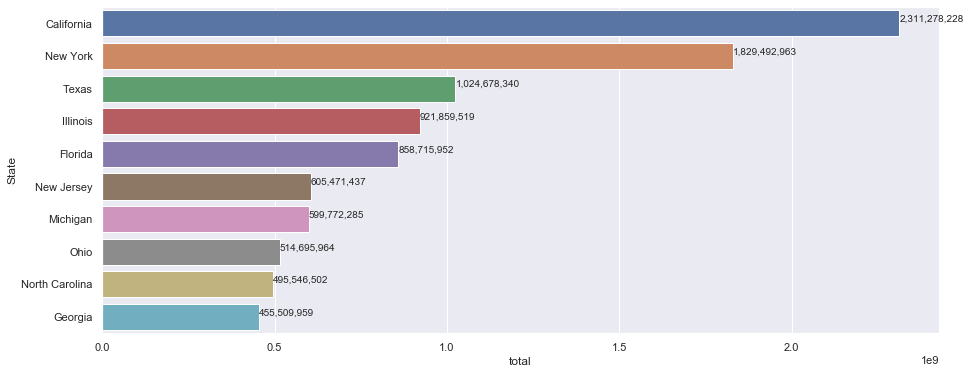

In [9]:
#Horizontal Barplot showing the Top 10 States affected by COVID-19
top_10 = us_states_grp.sort_values(by=['total'],ascending=False).head(10)
plt.figure(figsize=(15,6))
x=top_10['total']
y=top_10['State']
plot = sns.barplot(x,y)
for i,(value,name) in enumerate(zip(x,y)):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

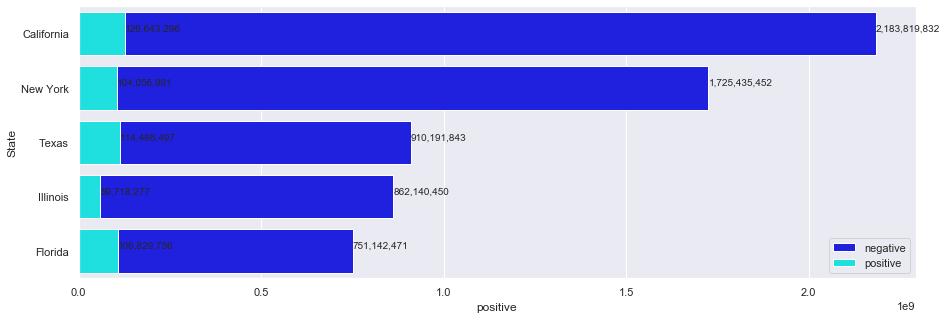

In [10]:
# Comparison of Positive versus Negative Cases for the Top 5 States affected due to COVID-19
top_5 = us_states_grp.sort_values(by=['total'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
negative = sns.barplot(top_5['negative'], top_5['State'], color = 'blue', label='negative')
positive = sns.barplot(top_5['positive'], top_5['State'], color = 'cyan', label='positive')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['negative'],top_5['State'])):
    negative.text(value,i-0.05,f'{value:,.0f}',size=10)
for i,(value,name) in enumerate(zip(top_5['positive'],top_5['State'])):
    positive.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.legend(loc=4)
plt.show()

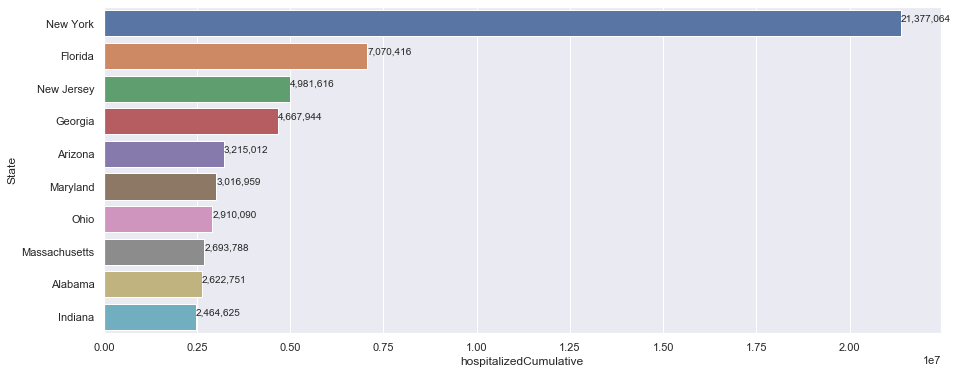

In [11]:
#Horizontal Barplot showing the Top 10 States with highest hospitalization by COVID-19 
top_10 = us_states_grp.sort_values(by=['hospitalizedCumulative'],ascending=False).head(10)
plt.figure(figsize=(15,6))
x=top_10['hospitalizedCumulative']
y=top_10['State']
plot = sns.barplot(x,y)
for i,(value,name) in enumerate(zip(x,y)):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

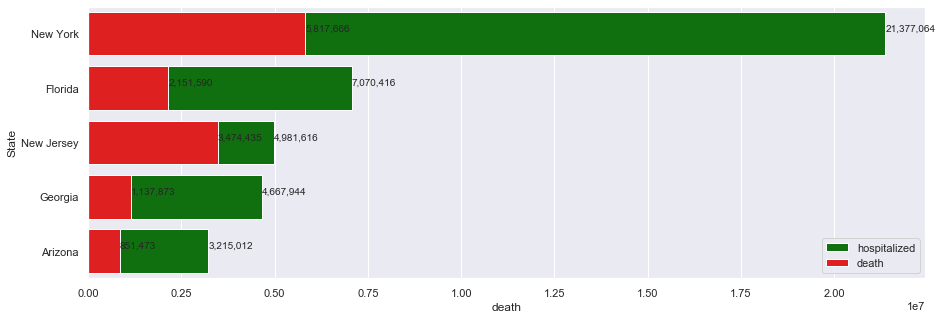

In [12]:
# Comparison of Hospitalized versus Deaths Cases for the Top 5 States affected by COVID-19
top_5 = us_states_grp.sort_values(by=['hospitalizedCumulative'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
hospitalized = sns.barplot(top_5['hospitalized'], top_5['State'], color = 'green', label='hospitalized')
death = sns.barplot(top_5['death'], top_5['State'], color = 'red', label='death')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['hospitalized'],top_5['State'])):
    hospitalized.text(value,i-0.05,f'{value:,.0f}',size=10)
for i,(value,name) in enumerate(zip(top_5['death'],top_5['State'])):
    death.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.legend(loc=4)
plt.show()

In [13]:
#Dataframe for plotting the Choropleth for the United States COVID-19
us_states_map = us_states_df.groupby(['State','Postal Code'])[['positive','total','death','recovered','hospitalized','hospitalizedCurrently','onVentilatorCurrently','deathIncrease']].max().reset_index()
us_states_map.describe()

positive         total         death     recovered  hospitalized  \
count  5.600000e+01  5.600000e+01     56.000000  4.800000e+01     42.000000   
mean   2.595363e+05  3.152391e+06   4881.678571  1.171759e+05  14018.404762   
std    2.886487e+05  4.609699e+06   6182.213243  1.710476e+05  17488.556982   
min    0.000000e+00  2.140000e+03      0.000000  2.900000e+01      4.000000   
25%    6.077050e+04  6.524252e+05    913.750000  1.344525e+04   2847.000000   
50%    1.882125e+05  1.826214e+06   2671.500000  4.884650e+04   9111.500000   
75%    3.652110e+05  3.443466e+06   5717.750000  1.687425e+05  17485.750000   
max    1.341700e+06  2.519505e+07  27149.000000  1.030716e+06  89995.000000   

       hospitalizedCurrently  onVentilatorCurrently  deathIncrease  
count              54.000000              36.000000      56.000000  
mean             2575.925926             379.388889     133.642857  
std              3439.192785             517.787948     180.247146  
min                 3.000000               0.000000       0.000000  
25%               531.250000              65.000000      30.000000  
50%              1717.000000             205.500000      71.000000  
75%              2828.250000             408.750000     158.000000  
max             18825.000000            2425.000000     951.000000

In [14]:
#'Positive COVID-19 Cases in US'

figure = px.choropleth(us_states_map,
                       locations='Postal Code', 
                       locationmode='USA-states',
                       scope='usa',
                       color='positive', 
                       hover_name='State', 
                       color_continuous_scale='turbo', 
                       range_color=[1,1200000],
                       title='Positive COVID-19 Cases in US')
figure.show()

In [15]:
# 'Currently Hospitalized COVID-19 Cases in US'

figure = px.choropleth(us_states_map,
                       locations='Postal Code', 
                       locationmode='USA-states',
                       scope='usa',
                       color='hospitalizedCurrently', 
                       hover_name='State', 
                       color_continuous_scale='darkmint', 
                       range_color=[1,15000],
                       title='Currently Hospitalized COVID-19 Cases in US')
figure.show()

In [16]:
# 'COVID-19 Deaths in US'

figure = px.choropleth(us_states_map,
                       locations='Postal Code', 
                       locationmode='USA-states',
                       scope='usa',
                       color='death', 
                       hover_name='State', 
                       color_continuous_scale='portland', 
                       range_color=[1,20000],
                       title='COVID-19 Deaths in US')
figure.show()

In [17]:
# 'Increase in the COVID-19 Death Rate in the US'
figure = px.choropleth(us_states_map,
                       locations='Postal Code', 
                       locationmode='USA-states',
                       scope='usa',
                       color='deathIncrease', 
                       hover_name='State', 
                       color_continuous_scale='reds', 
                       range_color=[1,250],
                       title='Increase in the COVID-19 Death Rate in the US')
figure.show()

In [18]:
# 'COVID-19 Patients Currently on Ventilator in the US'

figure = px.choropleth(us_states_map,
                       locations='Postal Code', 
                       locationmode='USA-states',
                       scope='usa',
                       color='onVentilatorCurrently', 
                       hover_name='State', 
                       color_continuous_scale='teal', 
                       range_color=[1,300],
                       title='COVID-19 Patients Currently on Ventilator in the US')
figure.show()

In [19]:
# Grouping the States which are under LOCKDOWN
state_grp1 = us_states_df[us_states_df['Postal Code'].isin(['DC', 'IL', 'MD', 'MS','VA'])]
state_grp2 = us_states_df[us_states_df['Postal Code'].isin(['AZ', 'FL', 'NC', 'TX'])]
state_grp3 = us_states_df[us_states_df['Postal Code'].isin(['MO', 'LA', 'MA','IL','NY','MI','PA'])]

In [20]:
# Building a Pivot Table to Index 'States' for plotting 
grp1_pt = state_grp1.pivot_table(index=['State','date'],values=['positiveIncrease'],aggfunc=np.sum).reset_index()
grp2_pt = state_grp2.pivot_table(index=['State','date'],values=['recovered'],aggfunc=np.sum).reset_index()
grp2a_pt = state_grp2.pivot_table(index=['State','date'],values=['deathIncrease'],aggfunc=np.sum).reset_index()
grp3a_pt = state_grp3.pivot_table(index=['State','date'],values=['recovered'],aggfunc=np.sum).reset_index()
grp3b_pt = state_grp3.pivot_table(index=['State','date'],values=['death'],aggfunc=np.sum).reset_index()

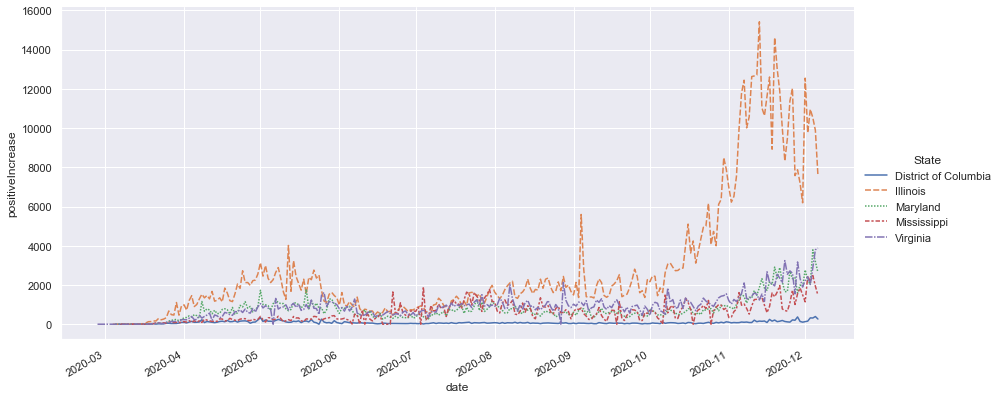

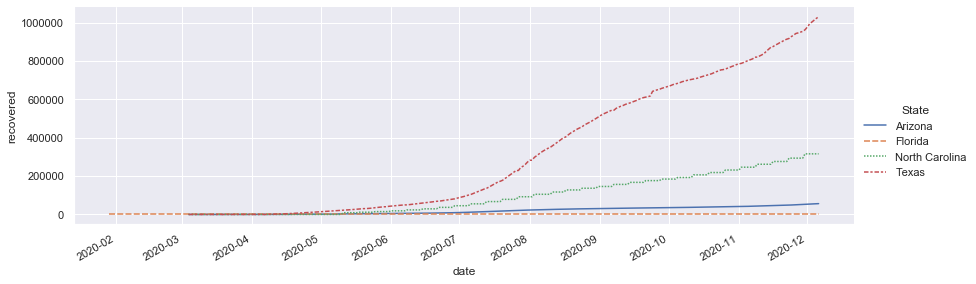

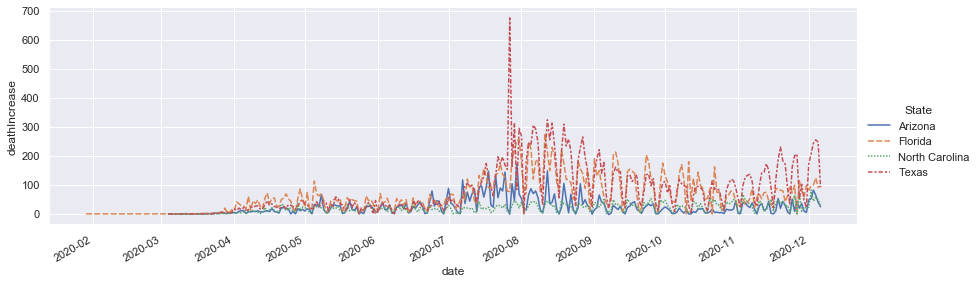

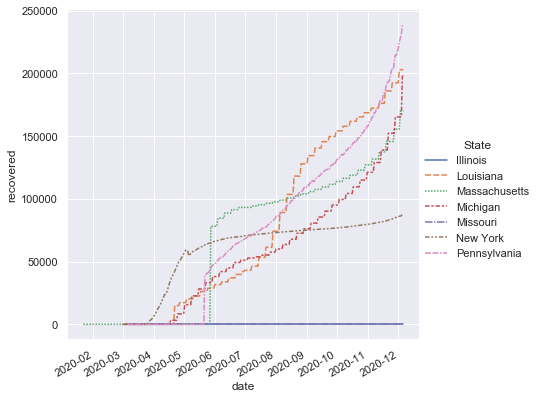

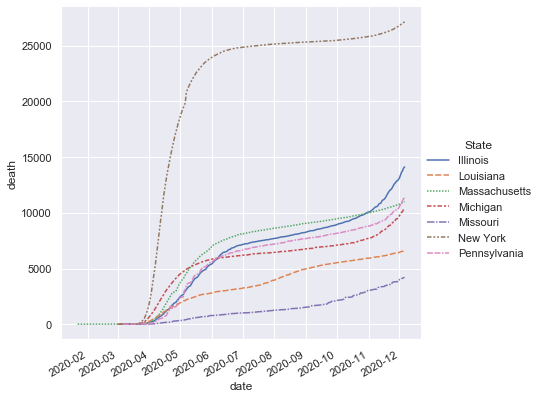

In [21]:
# Plotting using Seaborn to Visualize the groups with thier attributes
sns.set_theme(style="darkgrid")
sns.relplot(x="date", y="positiveIncrease", hue='State', style='State', kind="line", height=6,aspect=2, data=grp1_pt).fig.autofmt_xdate()
sns.relplot(x="date", y="recovered", hue='State', kind="line", style='State', height=4,aspect=3, data=grp2_pt).fig.autofmt_xdate()
sns.relplot(x="date", y="deathIncrease", hue='State', kind="line", style='State', height=4,aspect=3, data=grp2a_pt).fig.autofmt_xdate()
sns.relplot(x="date", y="recovered", hue='State', kind="line", style='State', height=6,aspect=1, data=grp3a_pt).fig.autofmt_xdate()
sns.relplot(x="date", y="death", hue='State', kind="line", style='State', height=6,aspect=1, data=grp3b_pt).fig.autofmt_xdate()